In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras


In [2]:
# loading the data
with_mask_files = os.listdir('data/with_mask')
without_mask_files = os.listdir('data/without_mask')



In [3]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 1000
Number of without mask images: 1000


In [4]:
# create the labels

with_mask_labels = [1]*1000

without_mask_labels = [0]*1000

In [5]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

2000
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


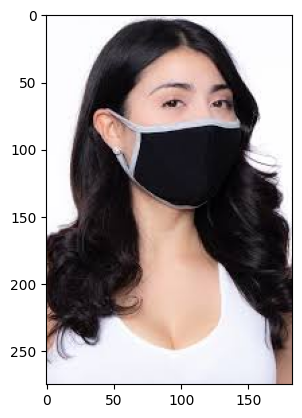

In [6]:
# displaying with mask image
img = mpimg.imread('data\with_mask\with_mask_2246.jpg')
imgplot = plt.imshow(img)


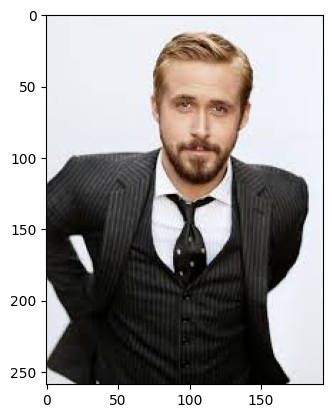

In [7]:
# displaying without mask image
img = mpimg.imread('data\without_mask\without_mask_2878.jpg')
imgplot = plt.imshow(img)
plt.show()

In [8]:
# convert images to numpy arrays+

with_mask_path = 'data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = 'data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [9]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [10]:
#split data into 80% training && 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2) 

In [11]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 128, 128, 3) (1600, 128, 128, 3) (400, 128, 128, 3)


In [12]:
# scaling the data

X_train = X_train/255

X_test = X_test/255

In [13]:

# build neural network model

model = keras.Sequential()

# convlutional neural network 
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),input_shape=(128,128,3))
model.add(keras.layers.MaxPooling2D(pool_size=(4,4)))

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(4,4)))

model.add(keras.layers.Flatten())


#input layers
model.add(keras.layers.Dense(512, activation='relu'))

model.add(keras.layers.Dense(128, activation='relu'))

model.add(keras.layers.Dense(128, activation='relu'))

model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dropout(0.5))
#  the output layer
model.add(keras.layers.Dense(2, activation='sigmoid')) 

In [14]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [15]:
# training the neural network
history=model.fit(X_train, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
45/45 [==============================] - 20s 376ms/step - loss: 0.5850 - acc: 0.6931 - val_loss: 0.3772 - val_acc: 0.8687
Epoch 2/5
45/45 [==============================] - 15s 326ms/step - loss: 0.3564 - acc: 0.8479 - val_loss: 0.3212 - val_acc: 0.8562
Epoch 3/5
45/45 [==============================] - 15s 336ms/step - loss: 0.2599 - acc: 0.8924 - val_loss: 0.3349 - val_acc: 0.8375
Epoch 4/5
45/45 [==============================] - 15s 323ms/step - loss: 0.2030 - acc: 0.9278 - val_loss: 0.2093 - val_acc: 0.9312
Epoch 5/5
45/45 [==============================] - 15s 342ms/step - loss: 0.1504 - acc: 0.9424 - val_loss: 0.2173 - val_acc: 0.9000


In [16]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)
print('Test Loss =', loss)

13/13 [==============================] - 1s 72ms/step - loss: 0.1654 - acc: 0.9400
Test Accuracy = 0.9399999976158142
Test Loss = 0.16542764008045197


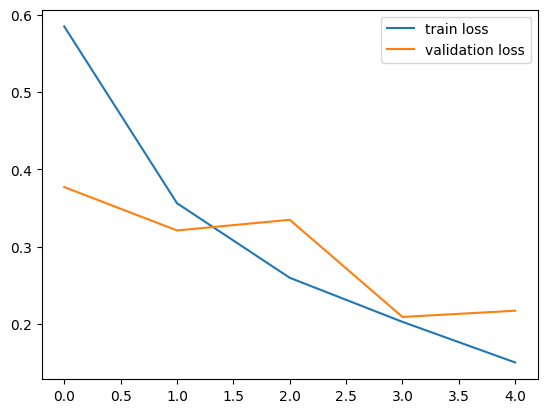

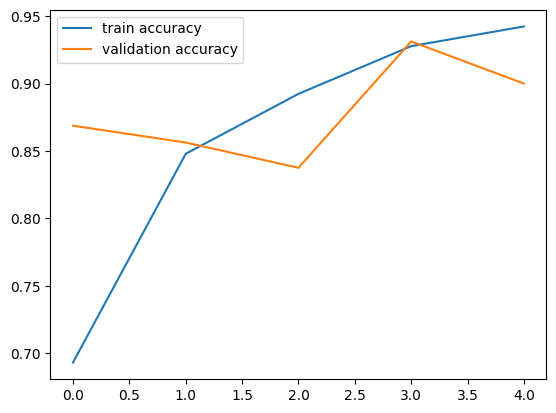

In [17]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [18]:
model.save("C:/Users/lap shop/Desktop/nn/face mask model.h5")


1/1 [==============================] - 0s 42ms/step
[[0.07501423 0.9208802 ]]
1
The person in the image is  wearing a mask


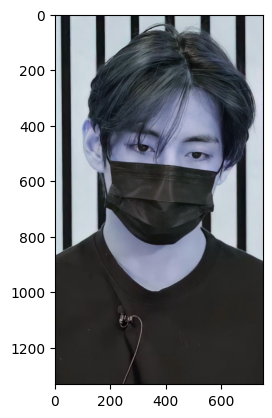

In [21]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is  wearing a mask')

else:

  print('The person in the image is not wearing a mask')

1/1 [==============================] - 0s 32ms/step
[[0.556626   0.44959626]]
0
The person in the image is not wearing a mask


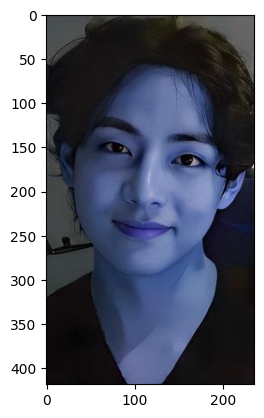

In [22]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is  wearing a mask')

else:

  print('The person in the image is not wearing a mask')